# ispace ５分足 with OBV

In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import re
import yfinance as yf

pattern = re.compile(r'(.+)\.T')
#pattern = re.compile(r'\^(.+)')

symbol = '9348.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1d', interval='5m')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-01-16 09:00:00+09:00,768.0,768.0,768.0,768.0,0,0.0,0.0
2025-01-16 09:05:00+09:00,768.0,774.0,743.0,769.0,419400,0.0,0.0
2025-01-16 09:10:00+09:00,767.0,768.0,731.0,736.0,363000,0.0,0.0
2025-01-16 09:15:00+09:00,735.0,746.0,719.0,723.0,434500,0.0,0.0
2025-01-16 09:20:00+09:00,721.0,722.0,701.0,710.0,815700,0.0,0.0


## On-Balance Volume

In [2]:
def calc_obv(r):
    if r == 0:
        return 0

    obv_prev = list_obv[r - 1]
    close_prev = df.iloc[r - 1]['Close']
    close_curr = df.iloc[r]['Close']
    volume_curr = df.iloc[r]['Volume']

    if close_prev < close_curr:
        v_sign = +1
    elif close_prev > close_curr:
        v_sign = -1
    else:
        v_sign = 0

    return obv_prev + volume_curr * v_sign

list_obv = list()
for r in range(len(df)):
    list_obv.append(calc_obv(r))

## Charts

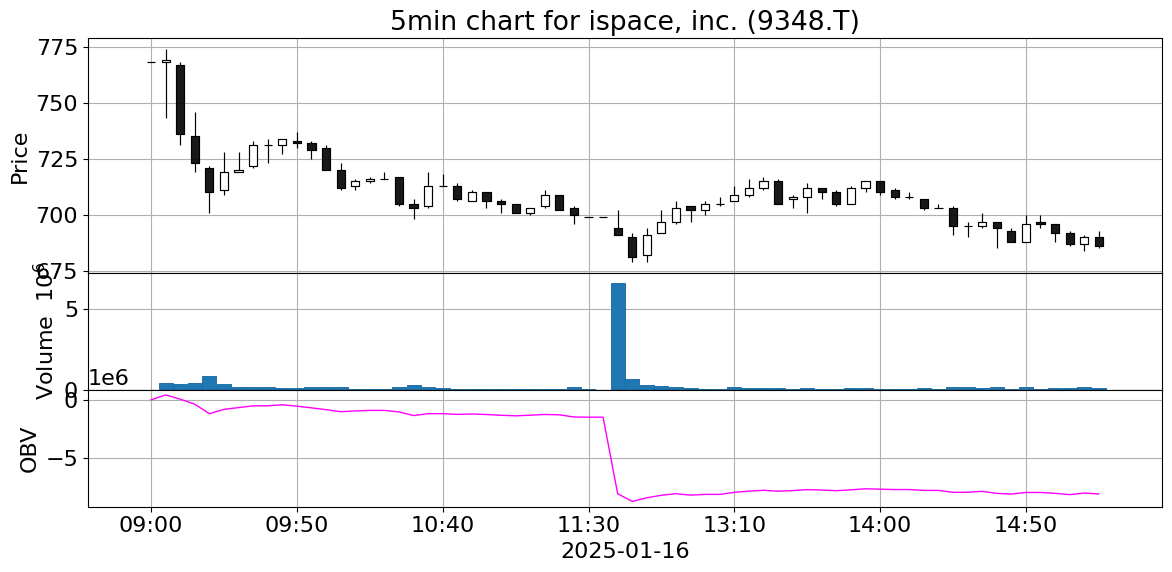

In [3]:
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))

ax = dict()
n = 3
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

apds  = [
    mpf.make_addplot(
        list_obv,
        width=1,
        color='magenta',
        ax=ax[2]
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%H:%M',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

ax[2].set_ylabel('OBV')
ax[2].set_xlabel(df.index[0].date())

try:
    ax[0].set_title('5min chart for %s (%s)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('5min chart for %s' % symbol)

plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('5m_chart_%s.png' % m.group(1))
else:
    plt.savefig('5m_chart_%s.png' % symbol)

plt.show()